In [44]:
import numpy as np
from scipy.optimize import minimize
from scipy.io import loadmat
from numpy.linalg import det, inv
from math import sqrt, pi
import scipy.io
import matplotlib.pyplot as plt
import pickle
import sys
from scipy.stats import multivariate_normal 
def meanv(X,y):
    s=np.shape(X)
    
    m1=[]
    m2=[]
    m3=[]
    m4=[]
    m5=[]
    for i in range(len(X)):
        if (y[i]==1.):
         list=[]
         for j in range(s[1]):
            
            list.append(X[i][j])
         m1.append(list)
        
        if (y[i]==2.):
         list=[]
         for j in range(s[1]):
            
            list.append(X[i][j])
         m2.append(list)
        
        if (y[i]==3.):
         list=[]
         for j in range(s[1]):
            
            list.append(X[i][j])
         m3.append(list)
        if (y[i]==4.):
         list=[]
         for j in range(s[1]):
            
            list.append(X[i][j])
         m4.append(list)
        if (y[i]==5.):
         list=[]
         for j in range(s[1]):
            
            list.append(X[i][j])
         m5.append(list)
    a=np.array(m1)
    mean1=np.mean(a,axis=0)
    a=np.array(m2)
    mean2=np.mean(a,axis=0)
    a=np.array(m3)
    mean3=np.mean(a,axis=0)
    a=np.array(m4)
    mean4=np.mean(a,axis=0)
    a=np.array(m5)
    mean5=np.mean(a,axis=0)
    list1=[]
    list1.append(mean1)
    list1.append(mean2)
    list1.append(mean3)
    list1.append(mean4)
    list1.append(mean5)
    means=np.array(list1)
    means=means.T
    return means
def ldaLearn(X,y):
    # Inputs
    # X - a N x d matrix with each row corresponding to a training example
    # y - a N x 1 column vector indicating the labels for each training example
    #
    # Outputs
    # means - A d x k matrix containing learnt means for each of the k classes
    # covmat - A single d x d learnt covariance matrix 
    means=meanv(X,y)
    s=X.shape
    c=np.array(X)
    a=np.std(c,axis=0)
    covmat=np.zeros([s[1],s[1]])
    for x in range(s[1]):
      covmat[x][x]=(a[x])**2
    
    
    return means,covmat

    # IMPLEMENT THIS METHOD 
    return means,covmat

def qdaLearn(X,y):
    means=meanv(X,y)
    # Inputs
    # X - a N x d matrix with each row corresponding to a training example
    # y - a N x 1 column vector indicating the labels for each training example
    #
    # Outputs
    # means - A d x k matrix containing learnt means for each of the k classes
    # covmats - A list of k d x d learnt covariance matrices for each of the k classes
    
    # IMPLEMENT THIS METHOD
    s=np.shape(X)
    covmats=[]
    m1=[]
    m2=[]
    m3=[]
    m4=[]
    m5=[]
    for i in range(len(X)):
        if (y[i]==1.):
         list=[]
         for j in range(s[1]):
            
            list.append(X[i][j])
         m1.append(list)
        
        if (y[i]==2.):
         list=[]
         for j in range(s[1]):
            
            list.append(X[i][j])
         m2.append(list)
        
        if (y[i]==3.):
         list=[]
         for j in range(s[1]):
            
            list.append(X[i][j])
         m3.append(list)
        if (y[i]==4.):
         list=[]
         for j in range(s[1]):
            
            list.append(X[i][j])
         m4.append(list)
        if (y[i]==5.):
         list=[]
         for j in range(s[1]):
            
            list.append(X[i][j])
         m5.append(list)
    m1=np.array(m1)
    m2=np.array(m2)
    m3=np.array(m3)
    m4=np.array(m4)
    m5=np.array(m5)
    m1=m1.T
    cov1=np.cov(m1)
    covmats.append(cov1)
    m2=m2.T
    cov2=np.cov(m2)
    covmats.append(cov2)
    m3=m3.T
    cov3=np.cov(m3)
    covmats.append(cov3)
    m4=m4.T
    cov4=np.cov(m4)
    covmats.append(cov4)
    m5=m5.T
    cov5=np.cov(m5)
    covmats.append(cov5)
    covmats=np.array(covmats)
    return means,covmats

def ldaTest(means,covmat,Xtest,ytest):
    # Inputs
    # means, covmat - parameters of the LDA model
    # Xtest - a N x d matrix with each row corresponding to a test example
    # ytest - a N x 1 column vector indicating the labels for each test example
    # Outputs
    # acc - A scalar accuracy value
    # ypred - N x 1 column vector indicating the predicted labels
    means,covmat=ldaLearn(X,y)
    mean=means.T
    count=0
    ypred=[]
    total=len(ytest)


    n=Xtest.shape
    a=multivariate_normal.pdf(Xtest, mean[0], covmat)
    b=multivariate_normal.pdf(Xtest, mean[1], covmat)
    c=multivariate_normal.pdf(Xtest, mean[2], covmat)
    d=multivariate_normal.pdf(Xtest, mean[3], covmat)
    e=multivariate_normal.pdf(Xtest, mean[4], covmat)
    
    for i in range(len(Xtest)):
     if(max(a[i],b[i],c[i],d[i],e[i])==a[i]):
        ypred.append(1.0)
     if(max(a[i],b[i],c[i],d[i],e[i])==b[i]):
        ypred.append(2.0)
     if(max(a[i],b[i],c[i],d[i],e[i])==c[i]):
        ypred.append(3.0)
     if(max(a[i],b[i],c[i],d[i],e[i])==d[i]):
        ypred.append(4.0)
     if(max(a[i],b[i],c[i],d[i],e[i])==e[i]):
        ypred.append(5.0)
    for i in range(len(ytest)):
     if(ypred[i]==ytest[i]):
        count=count+1
    acc=count/total
    ypred=np.array(ypred)
    ypred=ypred.ravel()
    # IMPLEMENT THIS METHOD
    return acc,ypred
def qdaTest(means,covmats,Xtest,ytest):
    # Inputs
    # means, covmats - parameters of the QDA model
    # Xtest - a N x d matrix with each row corresponding to a test example
    # ytest - a N x 1 column vector indicating the labels for each test example
    # Outputs
    # acc - A scalar accuracy value
    # ypred - N x 1 column vector indicating the predicted labels

    # IMPLEMENT THIS METHOD
    means,covmats=qdaLearn(X,y)
    mean=means.T
    count=0
    ypred=[]
    total=len(ytest)
    cov1=covmats[0]
    cov2=covmats[1]
    cov3=covmats[2]
    cov4=covmats[3]
    cov5=covmats[4]

    n=Xtest.shape
    a=multivariate_normal.pdf(Xtest, mean[0], cov1)
    b=multivariate_normal.pdf(Xtest, mean[1], cov2)
    c=multivariate_normal.pdf(Xtest, mean[2], cov3)
    d=multivariate_normal.pdf(Xtest, mean[3], cov4)

    e=multivariate_normal.pdf(Xtest, mean[4], cov5)
    for i in range(len(Xtest)):
     if(max(a[i],b[i],c[i],d[i],e[i])==a[i]):
        ypred.append(1.0)
     if(max(a[i],b[i],c[i],d[i],e[i])==b[i]):
        ypred.append(2.0)
     if(max(a[i],b[i],c[i],d[i],e[i])==c[i]):
        ypred.append(3.0)
     if(max(a[i],b[i],c[i],d[i],e[i])==d[i]):
        ypred.append(4.0)
     if(max(a[i],b[i],c[i],d[i],e[i])==e[i]):
        ypred.append(5.0)
    for i in range(len(ytest)):
     if(ypred[i]==ytest[i]):
        count=count+1
    acc=count/total
    ypred=np.array(ypred)
    ypred=ypred.ravel()
    return acc,ypred

def learnOLERegression(X,y):
    # Inputs:                                                         
    # X = N x d 
    # y = N x 1                                                               
    # Output: 
    # w = d x 1 
     a=np.matmul(X.transpose(),X)
     b=inv(a)
     c=np.matmul(b,X.transpose())
     w=np.matmul(c,y)
    # IMPLEMENT THIS METHOD                                                   
     return w

def learnRidgeRegression(X,y,lambd):
    # Inputs:
    # X = N x d                                                               
    # y = N x 1 
    # lambd = ridge parameter (scalar)
    # Output:                                                                  
    # w = d x 1                                                                
    d=np.shape(X)
    N=d[1]
    I_d=np.identity(N)
    e=np.multiply(lambd,I_d)
    a=np.matmul(X.transpose(),X)                                                           
    f=np.add(e,a)
    g=inv(f)
    c=np.matmul(g,X.transpose())
    w=np.matmul(c,y)
    return w

def testOLERegression(w,Xtest,ytest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # ytest = X x 1
    # Output:
    # mse
    a=Xtest.shape
    N=a[0]
    b=0
    for x in range(N) :
     b=b+pow((ytest[x]-np.matmul(w.transpose(),Xtest[x])),2)
    mse=(1/N)*b
     
     
    
    # IMPLEMENT THIS METHOD
    return mse[0]
def regressionObjVal(w, X, y, lambd):

    # compute squared error (scalar) and gradient of squared error with respect
    # to w (vector) for the given data X and y and the regularization parameter
    # lambda   
    w=w.reshape(w.size,1)
    a=np.matmul(X,w)
    b=np.subtract(y,a)
    c=np.multiply(lambd,np.matmul(w.T,w))
    error=np.add(np.matmul(b.T,b),c)
    m=np.matmul(X.T,b)
    error_grad=np.add(np.multiply((-2),m),np.multiply((2*lambd),w))
    error_grad=error_grad.flatten()
    # IMPLEMENT THIS METHOD                                             
    return error[0],error_grad

def mapNonLinear(x,p):
    # Inputs:                                                                  
    # x - a single column vector (N x 1)                                       
    # p - integer (>= 0)                                                       
    # Outputs:                                                                 
    # Xp - (N x (p+1)) 
    # IMPLEMENT THIS METHOD
    a=np.shape(x)
    N=a[0]
    Xp=np.zeros((N,p+1))
    for i in range(N):
        Xp[i][0]=int(1)
    for i in range(N):
        for j in range(1,p+1):
            Xp[i][j]=(x[i])**j
            
    return Xp

LDA Accuracy = 0.97
QDA Accuracy = 0.96


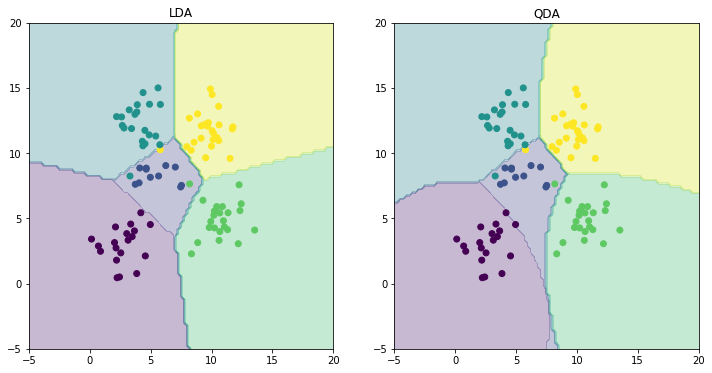

In [45]:

# Problem 1
# load the sample data                                                                 
if sys.version_info.major == 2:
    X,y,Xtest,ytest = pickle.load(open('sample.pickle','rb'))
else:
    X,y,Xtest,ytest = pickle.load(open('sample.pickle','rb'),encoding = 'latin1')

# LDA
means,covmat = ldaLearn(X,y)
ldaacc,ldares = ldaTest(means,covmat,Xtest,ytest)
print('LDA Accuracy = '+str(ldaacc))
# QDA
means,covmats = qdaLearn(X,y)
qdaacc,qdares = qdaTest(means,covmats,Xtest,ytest)
print('QDA Accuracy = '+str(qdaacc))

# plotting boundaries
x1 = np.linspace(-5,20,100)
x2 = np.linspace(-5,20,100)
xx1,xx2 = np.meshgrid(x1,x2)
xx = np.zeros((x1.shape[0]*x2.shape[0],2))
xx[:,0] = xx1.ravel()
xx[:,1] = xx2.ravel()
ytest=ytest.ravel()
fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)

zacc,zldares = ldaTest(means,covmat,xx,np.zeros((xx.shape[0],1)))
plt.contourf(x1,x2,zldares.reshape((x1.shape[0],x2.shape[0])),alpha=0.3)
plt.scatter(Xtest[:,0],Xtest[:,1],c=ytest)
plt.title('LDA')

plt.subplot(1, 2, 2)

zacc,zqdares = qdaTest(means,covmats,xx,np.zeros((xx.shape[0],1)))
plt.contourf(x1,x2,zqdares.reshape((x1.shape[0],x2.shape[0])),alpha=0.3)
plt.scatter(Xtest[:,0],Xtest[:,1],c=ytest)
plt.title('QDA')

plt.show()


In [96]:
# Problem 2
if sys.version_info.major == 2:
    X,y,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'))
else:
    X,y,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding = 'latin1')

# add intercept
X_i = np.concatenate((np.ones((X.shape[0],1)), X), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

w = learnOLERegression(X,y)
mle = testOLERegression(w,Xtest,ytest)

w_i = learnOLERegression(X_i,y)
mle_i = testOLERegression(w_i,Xtest_i,ytest)

print('MSE without intercept '+str(mle))
print('MSE with intercept '+str(mle_i))

MSE without intercept 106775.361555
MSE with intercept 3707.84018132


In [97]:
w

array([[ -4.12173302e+02],
       [ -3.45940349e+02],
       [  5.78814085e+02],
       [  5.89243805e+01],
       [ -1.35891612e+06],
       [  1.19462263e+06],
       [  5.07036457e+05],
       [ -1.34586972e+03],
       [  4.47713283e+05],
       [  4.77903799e+02],
       [ -1.40658376e+02],
       [ -9.19340329e+02],
       [ -3.95968904e+02],
       [ -7.25692640e+04],
       [ -8.95093665e+04],
       [ -3.23782609e+03],
       [  1.40730022e+03],
       [  3.91795186e+04],
       [  2.65084262e+02],
       [  5.12843509e+02],
       [  2.01158086e+02],
       [  6.99140521e+01],
       [ -4.24307012e+03],
       [  3.44644877e+03],
       [  2.22399630e+03],
       [ -1.77734526e+02],
       [  1.58033897e+03],
       [  1.08315565e+02],
       [  2.47108215e+02],
       [ -2.38458153e+01],
       [  7.93875957e+02],
       [  2.96369204e+02],
       [ -6.06952736e+02],
       [ -5.63192652e+02],
       [ -5.48068267e+02],
       [  9.69932251e+01],
       [  5.90070172e+02],
 

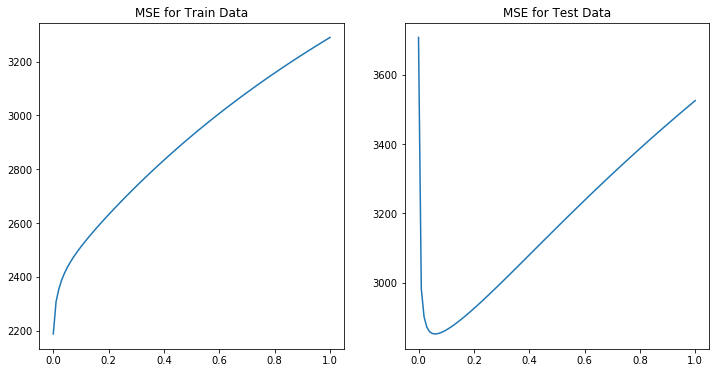

In [85]:
# Problem 3
k = 101
lambdas = np.linspace(0, 1, num=k)
i = 0
mses3_train = np.zeros((k,1))
mses3 = np.zeros((k,1))
for lambd in lambdas:
    w_l = learnRidgeRegression(X_i,y,lambd)
    mses3_train[i] = testOLERegression(w_l,X_i,y)
    mses3[i] = testOLERegression(w_l,Xtest_i,ytest)
    i = i + 1
fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(lambdas,mses3_train)
plt.title('MSE for Train Data')
plt.subplot(1, 2, 2)
plt.plot(lambdas,mses3)
plt.title('MSE for Test Data')

plt.show()


In [98]:
w_l

array([[  1.50194724e+02],
       [  2.17017543e+01],
       [ -3.90601518e+01],
       [  1.89768796e+02],
       [  1.31436318e+02],
       [  1.28716676e+01],
       [ -1.26470667e+01],
       [ -1.11677408e+02],
       [  9.94380881e+01],
       [  2.03314471e+02],
       [  1.12568603e+02],
       [  2.78730715e+01],
       [  5.56080895e+01],
       [  3.59495573e+01],
       [  9.32048870e+00],
       [ -1.48222719e+01],
       [  2.08310299e+00],
       [  2.61927349e+01],
       [ -1.17624731e+01],
       [  3.31969074e+01],
       [  4.11219097e+01],
       [ -1.62923171e+00],
       [  3.78170309e+01],
       [ -2.66159191e+01],
       [ -4.62761092e+01],
       [  3.38207547e-01],
       [  7.12858398e-01],
       [  3.04261676e+01],
       [  2.35812072e+01],
       [  9.14637300e+00],
       [  2.49299139e+01],
       [  1.97575987e+01],
       [ -1.76729830e-01],
       [  3.32517543e+01],
       [  4.63803229e+00],
       [  1.87958925e+01],
       [ -1.20399345e+01],
 

In [95]:
np.reshape(mses3.size,1)
ind = np.where(mses3==min(mses3))
print("Minimum value of lambda",lambdas[ind[0]])

Minimum value of lambda [ 0.06]


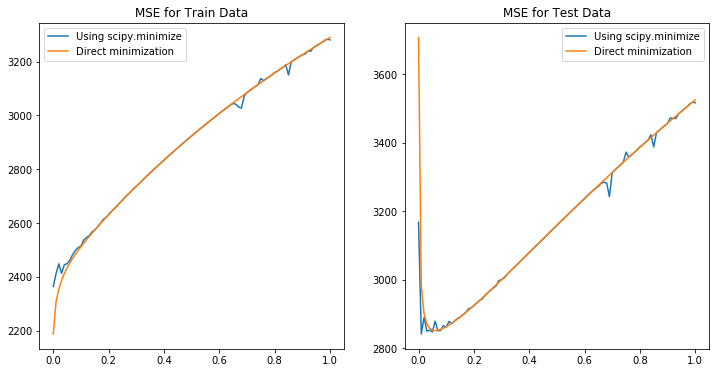

In [48]:
# Problem 4
k = 101
lambdas = np.linspace(0, 1, num=k)
i = 0
mses4_train = np.zeros((k,1))
mses4 = np.zeros((k,1))
opts = {'maxiter' : 20}    # Preferred value.                                                
w_init = np.ones((X_i.shape[1],1))
for lambd in lambdas:
    args = (X_i, y, lambd)
    w_l = minimize(regressionObjVal, w_init, jac=True, args=args,method='CG', options=opts)
    w_l = np.transpose(np.array(w_l.x))
    w_l = np.reshape(w_l,[len(w_l),1])
    mses4_train[i] = testOLERegression(w_l,X_i,y)
    mses4[i] = testOLERegression(w_l,Xtest_i,ytest)
    i = i + 1
fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(lambdas,mses4_train)
plt.plot(lambdas,mses3_train)
plt.title('MSE for Train Data')
plt.legend(['Using scipy.minimize','Direct minimization'])

plt.subplot(1, 2, 2)
plt.plot(lambdas,mses4)
plt.plot(lambdas,mses3)
plt.title('MSE for Test Data')
plt.legend(['Using scipy.minimize','Direct minimization'])
plt.show()


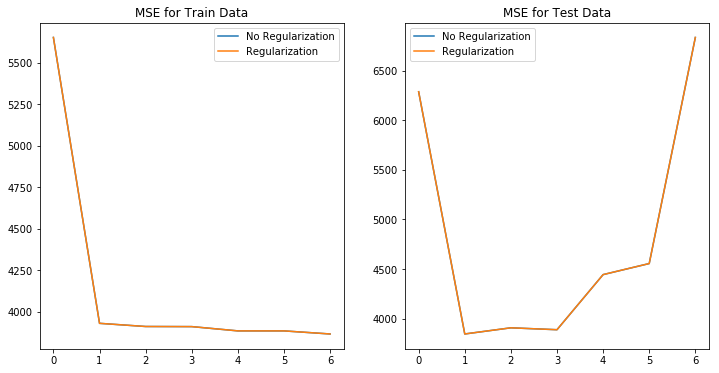

In [49]:
# Problem 5
pmax = 7
lambda_opt = 0 # REPLACE THIS WITH lambda_opt estimated from Problem 3
mses5_train = np.zeros((pmax,2))
mses5 = np.zeros((pmax,2))
for p in range(pmax):
    Xd = mapNonLinear(X[:,2],p)
    Xdtest = mapNonLinear(Xtest[:,2],p)
    w_d1 = learnRidgeRegression(Xd,y,0)
    mses5_train[p,0] = testOLERegression(w_d1,Xd,y)
    mses5[p,0] = testOLERegression(w_d1,Xdtest,ytest)
    w_d2 = learnRidgeRegression(Xd,y,lambda_opt)
    mses5_train[p,1] = testOLERegression(w_d2,Xd,y)
    mses5[p,1] = testOLERegression(w_d2,Xdtest,ytest)

fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(range(pmax),mses5_train)
plt.title('MSE for Train Data')
plt.legend(('No Regularization','Regularization'))
plt.subplot(1, 2, 2)
plt.plot(range(pmax),mses5)
plt.title('MSE for Test Data')
plt.legend(('No Regularization','Regularization'))
plt.show()